# Working with neuroimaging data in Python

We've already learned about general Python tools, but there is also a growing ecosystem of Python-based tools for working with neuroimaging data.

In this training, we will focus on `pybids`, `nibabel`, and `nilearn`.

In [1]:
%matplotlib inline
dataset_folder = '/scratch/madlab/condassoc_bids/'

## PyBIDS
[PyBIDS](https://bids-standard.github.io/pybids/) is a package for **working with BIDS datasets**.

With PyBIDS, you can:
1. Validate datasets to make sure they're BIDS compliant.
2. Search datasets for specific files.
3. Read in metadata for files within datasets.
4. Generate citable reports summarizing datasets.

In [2]:
from bids import BIDSLayout

In [10]:
layout = BIDSLayout(dataset_folder, validate=False)

In [28]:
print(layout.get_subjects())
print(layout.get_tasks())
print(layout.get_suffixes())

['001', '002', '004', '005', '006', '007', '008', '009', '010', '012', '017', '018', '019', '020', '021', '022', '023', '024', '026', '027']
['condassoc']
['bold', 'description', 'events', 'scans', 'T1w']


In [21]:
sub_runs = layout.get(subject='001', task='condassoc', extension='nii.gz')
sub_runs

[<BIDSImageFile filename='/scratch/madlab/condassoc_bids/sub-001/func/sub-001_task-condassoc_run-01_bold.nii.gz'>,
 <BIDSImageFile filename='/scratch/madlab/condassoc_bids/sub-001/func/sub-001_task-condassoc_run-02_bold.nii.gz'>,
 <BIDSImageFile filename='/scratch/madlab/condassoc_bids/sub-001/func/sub-001_task-condassoc_run-03_bold.nii.gz'>,
 <BIDSImageFile filename='/scratch/madlab/condassoc_bids/sub-001/func/sub-001_task-condassoc_run-04_bold.nii.gz'>,
 <BIDSImageFile filename='/scratch/madlab/condassoc_bids/sub-001/func/sub-001_task-condassoc_run-05_bold.nii.gz'>,
 <BIDSImageFile filename='/scratch/madlab/condassoc_bids/sub-001/func/sub-001_task-condassoc_run-06_bold.nii.gz'>]

In [30]:
layout.get_metadata(sub_runs[0].path)

{'AcquisitionDateTime': '2015-09-17T16:10:15',
 'BodyPartExamined': 'BRAIN',
 'ConversionSoftware': 'dcm2nii',
 'ConversionSoftwareVersion': '6-2013',
 'EchoTime': 0.025,
 'FlipAngle': 75.0,
 'ImageType': 'ORIGINAL_PRIMARY_EPI_NONE',
 'MagneticFieldStrength': 3.0,
 'Manufacturer': 'GE MEDICAL SYSTEMS',
 'ProcedureStepDescription': 'Mattfeld_WMAZE',
 'ProtocolName': 'Mattfeld_WMAZE',
 'RepetitionTime': 2.0,
 'ScanningSequence': 'EP_GR',
 'SequenceVariant': 'S_S',
 'SliceTiming': [0.0,
  1.0,
  0.047619047619047616,
  1.0476190476190477,
  0.09523809523809523,
  1.0952380952380953,
  0.14285714285714285,
  1.1428571428571428,
  0.19047619047619047,
  1.1904761904761905,
  0.23809523809523808,
  1.2380952380952381,
  0.2857142857142857,
  1.2857142857142858,
  0.3333333333333333,
  1.3333333333333333,
  0.38095238095238093,
  1.380952380952381,
  0.42857142857142855,
  1.4285714285714286,
  0.47619047619047616,
  1.4761904761904763,
  0.5238095238095238,
  1.5238095238095237,
  0.57142857

## NiBabel
[NiBabel](https://nipy.org/nibabel/) allows you to **read and write neuroimaging files**.

In [32]:
import nibabel as nib

In [31]:
# Grab a random nifti file from the dataset
f = layout.get(extension='nii.gz')[0].path
print(f)

/scratch/madlab/condassoc_bids/sub-001/anat/sub-001_run-01_T1w.nii.gz


In [38]:
# Load the file as an image object
img = nib.load(f)
print(type(img))

<class 'nibabel.nifti1.Nifti1Image'>


In [50]:
hed = img.header
print(type(hed))
hed.get_zooms()

<class 'nibabel.nifti1.Nifti1Header'>


(1.0, 1.0, 1.0)

In [36]:
data = img.get_data()
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(256, 256, 186)


## Nilearn
[Nilearn](http://nilearn.github.io) is primarily for doing machine learning on fMRI data, but it also provides a wide range of functionality, including:
- Applying masks to data
- Visualizing fMRI data
- Simple denoising and analysis
- Performing simple math on images

In [53]:
import nilearn as nl
from nilearn import masking

In [77]:
# Grab a random functional file from the dataset
f = layout.get(suffix='bold', extension='nii.gz')[0].path
print(f)
print(nib.load(f).shape)

/scratch/madlab/condassoc_bids/sub-001/func/sub-001_task-condassoc_run-01_bold.nii.gz
(96, 96, 42, 200)


In [59]:
mask = masking.compute_epi_mask(f)

In [60]:
data = masking.apply_mask(f, mask)

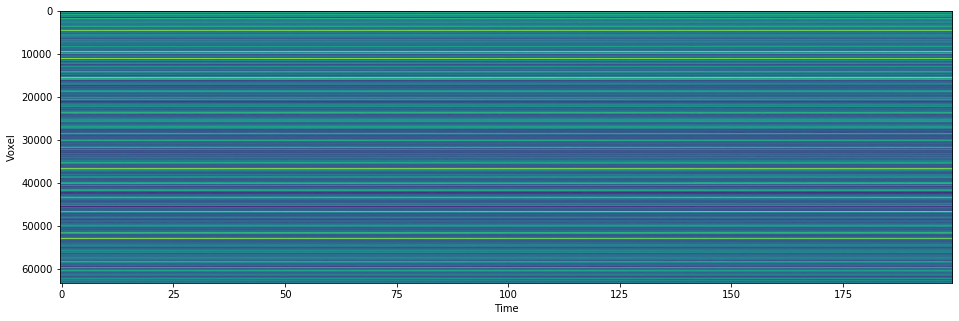

In [64]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 5))
ax.imshow(data.T, aspect='auto')
ax.set_xlabel('Time')
ax.set_ylabel('Voxel')
fig.show()

In [72]:
from nilearn import image

In [76]:
first_volume = image.index_img(f, 0)
print(first_volume.shape)

(96, 96, 42)


In [74]:
from nilearn import plotting

/home/data/cis/training-week-2019/env/lib/python3.6/site-packages/nilearn/image/resampling.py:510: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


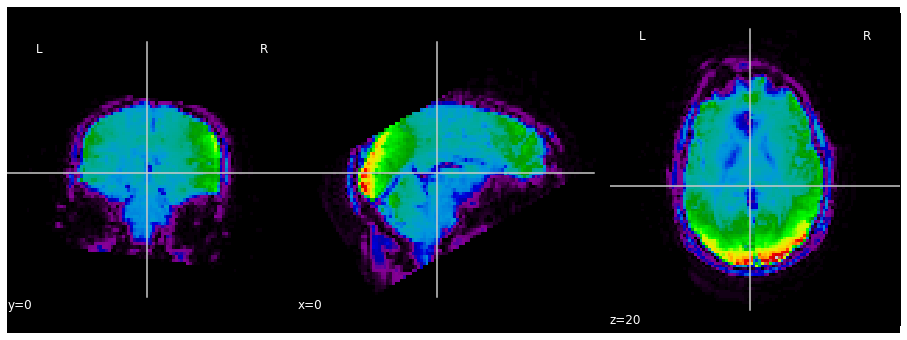

In [83]:
fig, ax = plt.subplots(figsize=(16, 6))
plotting.plot_epi(first_volume, axes=ax, cut_coords=[0, 0, 20])
fig.show()

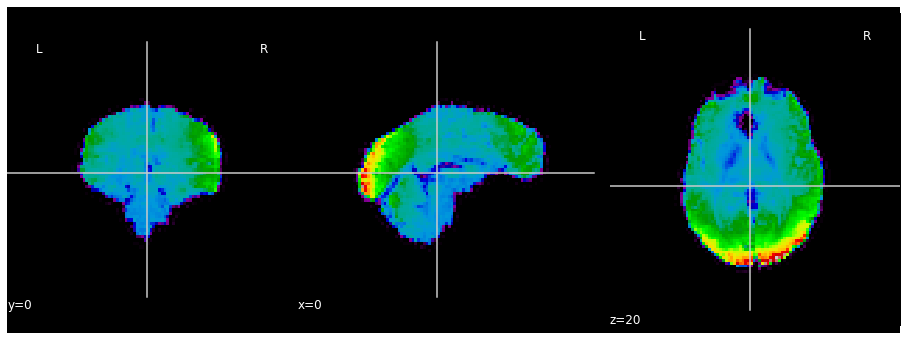

In [84]:
masked_first_volume = masking.unmask(masking.apply_mask(first_volume, mask), mask)
fig, ax = plt.subplots(figsize=(16, 6))
plotting.plot_epi(masked_first_volume, axes=ax, cut_coords=[0, 0, 20])
fig.show()